## Análise
    Base manutenção de sistemas e subsistemas

---

### Importação dos módulos utilizados

In [96]:
import pandas as pd
from numpy import std, mean, var, inf, isfinite, nan
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
pd.options.mode.chained_assignment = None  # default='warn'
import matplotlib.patches as mpatches

---

### Carregamento dos dados e padronização das colunas

In [2]:
csv = 'base.csv'
df_raw = pd.read_csv(csv, sep=';', encoding='latin-1')  # latin-1 no lugar de utf-8 salvou o dia aqui (Çs, acentos, etc..)
df_raw.columns = df_raw.columns.str.lower().str.strip()
rename = {
    'classe de manutenção - código': 'cod_classe_manutencao',
    'classe de manutenção - descrição': 'desc_classe_manutencao',
    'funcionário - código': 'cod_funcionario',
    'sistema veicular - código': 'cod_sistema',
    'sistema veicular - código.1': 'desc_sistema',
    'subsistema veicular - código': 'cod_subsistema',
    'subsistema veicular - descrição': 'desc_subsistema',
    'data de entrada': 'data_entrada',
    'data de saída': 'data_saida',
    '%sistema veicular': '%sistema_veicular',
    '%funcionário': '%funcionario',
    '%data de saída': '%data_saida',
    '%data de entrada': '%data_entrada',
    '%classe de manutenção': '%classe_manutencao',
    '% geral': '%geral'
}
df_raw.rename(rename, axis=1, inplace=True)
df_raw['desc_sistema'] = df_raw['desc_sistema'].str.capitalize()
df_raw['desc_subsistema'] = df_raw['desc_subsistema'].str.capitalize()

In [3]:
df_raw.head()

,cod_classe_manutencao,desc_classe_manutencao,data_entrada,data_saida,cod_funcionario,funcionário - descrição,cod_sistema,desc_sistema,cod_subsistema,desc_subsistema,horas,%sistema_veicular,%funcionario,%data_saida,%data_entrada,%classe_manutencao,%geral
0,29,Corret. Emergencial,01/04/2020,01/04/2020,22955,Marcelo Venceslau da Silva,1400,Sistema hidráulico,1402,Cilindro hidráulico,2.35,100.0,100.0,2.10,0.11,0.0,0.0
1,29,Corret. Emergencial,01/04/2020,01/04/2020,30413,Agnaldo Aparecido Monteiro,1300,Sistema elétrico,1312,Indicadores diversos,4.74,100.0,100.0,4.23,0.23,0.0,0.0
2,29,Corret. Emergencial,01/04/2020,01/04/2020,41598,Ademir de Jesus Aparecido,1400,Sistema hidráulico,1410,Mangueiras,2.99,100.0,100.0,2.67,0.15,0.0,0.0
3,29,Corret. Emergencial,01/04/2020,01/04/2020,50082,Alessandro Miranda,1000,Pneus e aros,1003,Pneus traseiros,0.29,100.0,100.0,0.26,0.01,0.0,0.0
4,29,Corret. Emergencial,01/04/2020,01/04/2020,52596,Josenaldo Silva Sousa,1300,Sistema elétrico,1301,Alternador,3.35,100.0,100.0,2.99,0.16,0.0,0.0


#### Colunas e tipos

In [4]:
df_raw.dtypes

cod_classe_manutencao        int64
desc_classe_manutencao      object
data_entrada                object
data_saida                  object
cod_funcionario              int64
funcionário - descrição     object
cod_sistema                  int64
desc_sistema                object
cod_subsistema               int64
desc_subsistema             object
horas                      float64
%sistema_veicular          float64
%funcionario               float64
%data_saida                float64
%data_entrada              float64
%classe_manutencao         float64
%geral                     float64
dtype: object

#### DataFrame para analise

In [5]:
df = df_raw[['desc_classe_manutencao', 'data_entrada', 'data_saida', 'cod_funcionario',
             'desc_sistema', 'desc_subsistema', 'horas']]
df.loc[df['desc_classe_manutencao'].isin(['Apoio', 'Preventiva Condição', 'Preventiva por Tempo']), 'desc_classe_manutencao'] = 'Preventivas'

df['data_entrada'] = pd.to_datetime(df['data_entrada'], format='%d/%m/%Y')
df['mes'] = df['data_entrada'].dt.month
df['ano'] = df['data_entrada'].dt.year

---

### Por sistema

In [6]:
pd.DataFrame(df.groupby('desc_sistema')['horas'].describe()).reset_index().sort_values('std')

,desc_sistema,count,mean,std,min,25%,50%,75%,max
2,Bomba pressão água,7.0,0.102857,0.072736,0.06,0.0600,0.060,0.1150,0.25
10,Injeção eletrônica,284.0,0.498204,0.510612,0.00,0.2800,0.395,0.5600,7.00
15,Pneus e aros,2985.0,1.170131,1.093782,0.00,0.4400,0.800,1.5400,10.75
19,Sistema de direção,702.0,1.100712,2.098608,0.00,0.1300,0.380,0.9875,24.63
7,Elevador,616.0,2.179416,2.127124,0.04,0.7575,1.410,2.7700,15.36
3,Cabine,1565.0,2.419649,2.213698,0.00,0.8700,1.940,3.5300,22.03
14,Motor,6520.0,1.027313,2.278168,0.00,0.1100,0.250,0.7300,68.20
22,Sistema elétrico,7029.0,2.088326,2.284616,0.00,0.7100,1.480,2.8200,59.02
18,Sistema de arrefecimento,640.0,2.449922,2.384177,0.00,0.4400,1.625,4.0225,14.16
20,Sistema de suspensão,2099.0,2.640010,2.611734,0.00,0.8750,1.990,3.8400,46.72


Alguns sistemas são muito mais consistentes em suas horas, como "Pneus e aros" e "Sistema de direção". Do outro lado do espectro, "Implemento" e "Sistema de alimentação" possuem valores mais espalhados.

#### Média de horas

##### Gráfico 1

Text(0.5, 0, 'Horas')

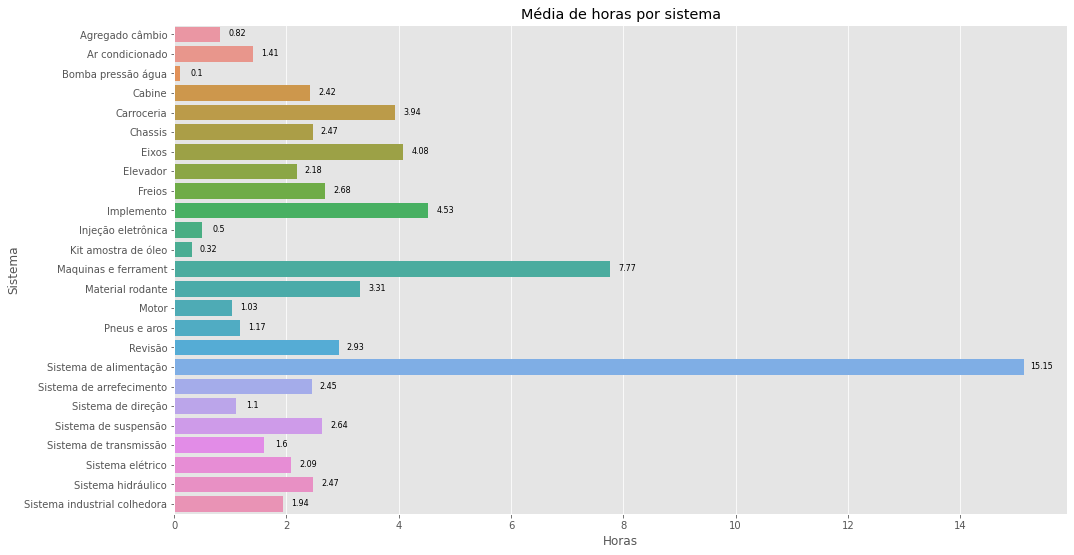

In [7]:
data_gm = pd.DataFrame(df.groupby('desc_sistema')['horas'].mean()).reset_index()  # dados

fig, ax = plt.subplots(figsize=(16, 9))
gm = sns.barplot(ax=ax, data=data_gm, y='desc_sistema', x='horas')

for p in ax.patches:  # coloca o valor da coluna em cima dela
    ax.text(p.get_x() + p.get_width() + 0.3, p.get_y()+0.6, f'{round(p.get_width(), 2)}',
             fontsize=8, color='black', ha='center', va='bottom')


ax.set_title('Média de horas por sistema')
ax.set_ylabel('Sistema')
ax.set_xlabel('Horas')

#### Media horas por subsistema

In [8]:
pd.DataFrame(df.groupby(['desc_sistema', 'desc_subsistema'])['horas'].mean()).reset_index()

,desc_sistema,desc_subsistema,horas
0,Agregado câmbio,Eixo piloto,0.820000
1,Ar condicionado,Compres. ar condicionado,2.865429
2,Ar condicionado,Correia,0.460000
3,Ar condicionado,Filtro externo,1.153333
4,Ar condicionado,Filtro interno,0.247826
...,...,...,...
712,Sistema industrial colhedora,Sapata flutuante,2.112000
713,Sistema industrial colhedora,Sincronismo,1.154615
714,Sistema industrial colhedora,Suspensão,1.605424
715,Sistema industrial colhedora,Trem de rolos,1.694706


##### Gráfico 2

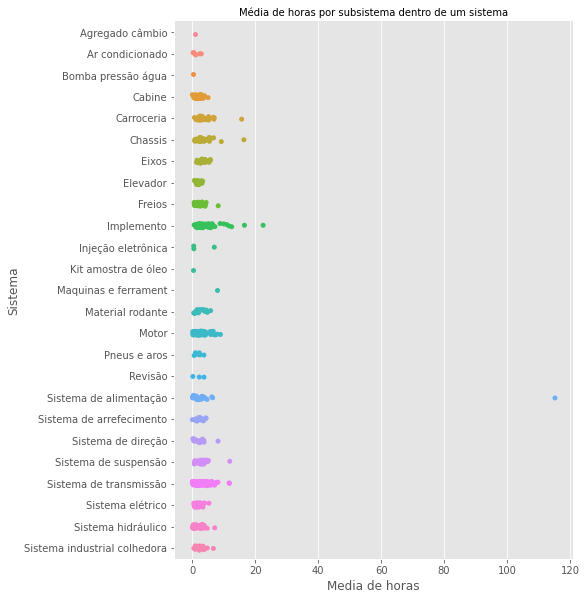

In [9]:
data_gms = pd.DataFrame(df.groupby(['desc_sistema', 'desc_subsistema'])['horas'].mean()).reset_index()  # dados

# fig2, ax2 = plt.subplots(figsize=(16, 9))
gms = sns.catplot(data=data_gms, y='desc_sistema', x='horas', height=8)


plt.title('Média de horas por subsistema dentro de um sistema', fontdict={'size': 10,
                                                                          'ha': 'center'})
gms.set_ylabels('Sistema')
gms.set_xlabels('Media de horas')

#### Desconsiderando 'Sistemas de alimentação'

##### Gráfico 3

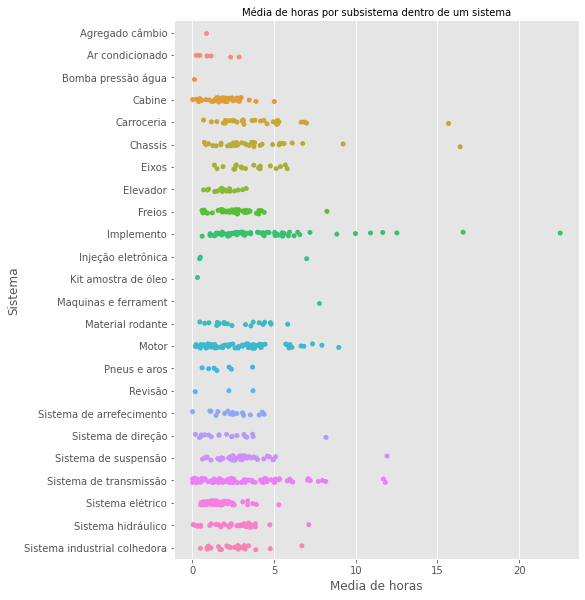

In [10]:
data_gms = pd.DataFrame(df.groupby(['desc_sistema', 'desc_subsistema'])['horas'].mean()).reset_index()  # dados

# fig2, ax2 = plt.subplots(figsize=(16, 9))
gms = sns.catplot(data=data_gms.query('desc_sistema != "Sistema de alimentação"'), y='desc_sistema', x='horas', height=8)


plt.title('Média de horas por subsistema dentro de um sistema', fontdict={'size': 10,
                                                                          'ha': 'center'})
gms.set_ylabels('Sistema')
gms.set_xlabels('Media de horas')

As manutenções realizadas dentro de um mesmo sistema costumam variar consideravelmente entre subsistemas.

---

### Por funcionário

#### Médias

In [11]:
df.groupby(['cod_funcionario'])['horas'].describe().sort_values('std', ascending=False)

,count,mean,std,min,25%,50%,75%,max
cod_funcionario,,,,,,,,
107918,12.0,146.746667,108.165417,0.29,0.290,219.975,219.9800,219.98
104819,8.0,192.742500,77.023122,2.12,219.965,219.980,219.9800,219.98
33546,54.0,24.644815,69.711968,0.06,0.130,0.170,0.3175,219.99
41598,83.0,19.026506,61.371067,0.03,0.090,0.130,0.4700,219.99
48392,93.0,14.304839,54.307183,0.05,0.060,0.080,0.1100,219.99
...,...,...,...,...,...,...,...,...
109620,1.0,0.500000,NaN,0.50,0.500,0.500,0.5000,0.50
109622,1.0,0.270000,NaN,0.27,0.270,0.270,0.2700,0.27
109624,1.0,0.330000,NaN,0.33,0.330,0.330,0.3300,0.33


##### Gráfico 4

Text(0.5, 1.0, 'Média de horas por sistema por funcionario')

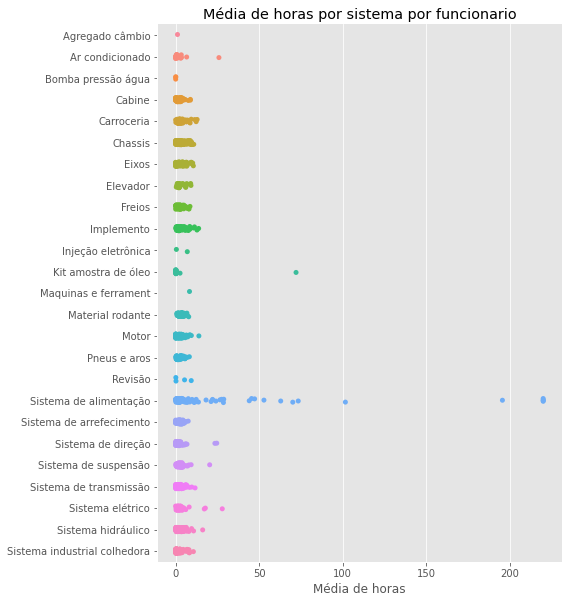

In [12]:
data_gmf = pd.DataFrame(df.groupby(['desc_sistema', 'cod_funcionario'])['horas'].mean()).reset_index()  # dados

gmf = sns.catplot(data=data_gmf, y='desc_sistema', x='horas', height=8)


gmf.set_xlabels('Média de horas')
gmf.set_ylabels('')
plt.title('Média de horas por sistema por funcionario')

#### Quantidade de manutenções

In [13]:
df_colaboradores = df.groupby('cod_funcionario')['horas'].describe()
df_colaboradores['var'] = df.groupby('cod_funcionario')['horas'].agg(var)
colaboradores_distribuicao = pd.cut(df_colaboradores['count'], [0, 10, 50, 100, 200, 500, inf],
                                    labels=['<= 10', '10-50', '50-100', '100-200', '200-500', '> 500'])
df_colaboradores['range_count'] = colaboradores_distribuicao

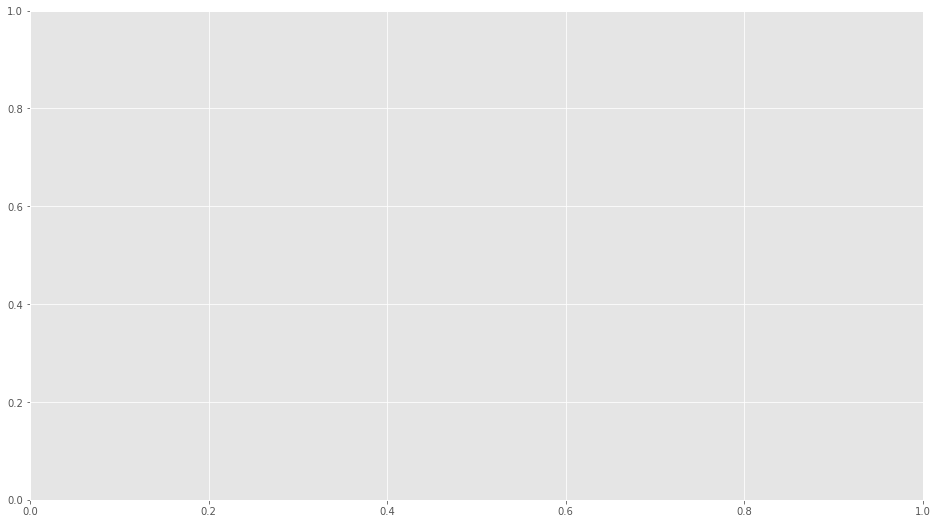

In [14]:
fig2, ax2 = plt.subplots(figsize=(16, 9))
# fig.suptitle()

##### Gráfico 5

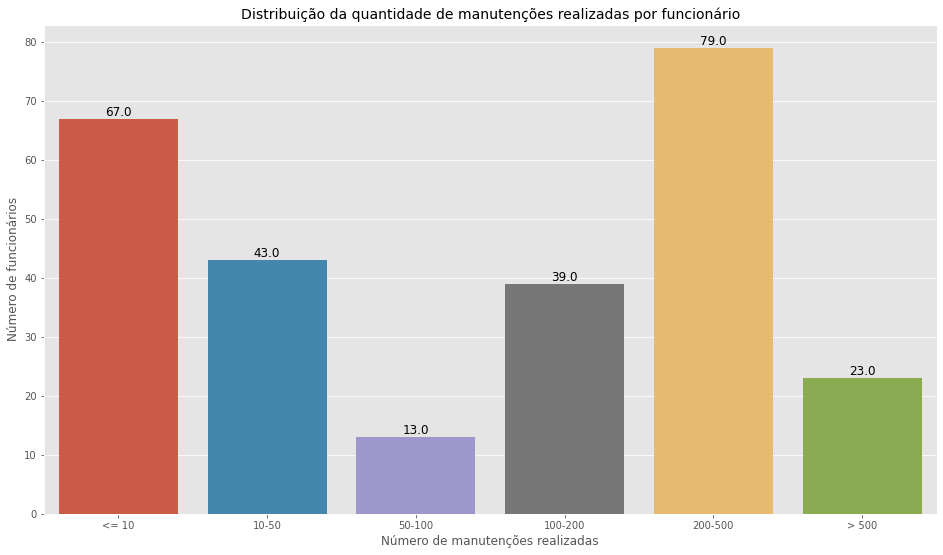

In [15]:
data_gc1 = df_colaboradores.reset_index().groupby('range_count').count().reset_index()  # dados
gc1 = sns.barplot(ax=ax2, data=data_gc1, x='range_count', y='cod_funcionario')  # figura

for p in ax2.patches:  # coloca o valor da coluna em cima dela
    ax2.text(p.get_x() + p.get_width()/2., p.get_height(), f'{round(p.get_height(), 2)}',
             fontsize=12, color='black', ha='center', va='bottom')

ax2.set_title('Distribuição da quantidade de manutenções realizadas por funcionário', size=14)
ax2.set_ylabel('Número de funcionários')
ax2.set_xlabel('Número de manutenções realizadas')
fig2

Há uma boa distribuição dos colaboradores quanto a quantidade de manutenções realizadas, com 102 deles tendo efetuado mais de 102, significando um bom contingente de colaboradores experientes (cerca de 38%).
Contudo, o número de colaboradores com menos de 50 manutenções realizadas também é grande, 110, indicando que cerca de 41% possuem pouca experiencia.

#### Colaboradores mais consistentes

In [16]:
df_colaboradores.sort_values('var', ascending=True).head()

,count,mean,std,min,25%,50%,75%,max,var,range_count
cod_funcionario,,,,,,,,,,
110222,2.0,219.980000,0.000000,219.98,219.9800,219.980,219.9800,219.98,0.000000,<= 10
102224,4.0,0.170000,0.000000,0.17,0.1700,0.170,0.1700,0.17,0.000000,<= 10
53776,2.0,0.055000,0.007071,0.05,0.0525,0.055,0.0575,0.06,0.000050,<= 10
51593,8.0,219.973750,0.030677,219.90,219.9775,219.985,219.9900,219.99,0.000941,<= 10
110223,3.0,219.953333,0.046188,219.90,219.9400,219.980,219.9800,219.98,0.002133,<= 10


110222, 102224, 53776, 51593, 110223 possuem a menor variância entre todos os colaboradores, indicando maior consistencia no tempo de manutenção. Contudo, a quantidade de manutenções realizadas por eles <b> está abaixo da média (193)</b>, indicando uma possível distorção na medida.

---

### Por classe de manutenção

In [17]:
def coeficiente_var(series):
    return (std(series)/mean(series))*100
df.groupby('desc_classe_manutencao')['horas'].agg(['describe', coeficiente_var])

describe                                            \
                          count       mean        std  min     25%    50%   
desc_classe_manutencao                                                      
Corret. Emergencial     27649.0   4.159516  16.457490  0.0  0.9100  1.920   
Preditiva                 216.0  10.444444  12.688490  0.1  3.2975  5.705   
Preventivas             23198.0   1.066978   2.346406  0.0  0.1300  0.330   

                                        coeficiente_var  
                            75%     max           horas  
desc_classe_manutencao                                   
Corret. Emergencial      3.9600  219.99      395.651601  
Preditiva               12.1925   73.46      121.203996  
Preventivas              1.0000   93.68      219.906721

##### Gráfico 6

Text(0.5, 0, '')

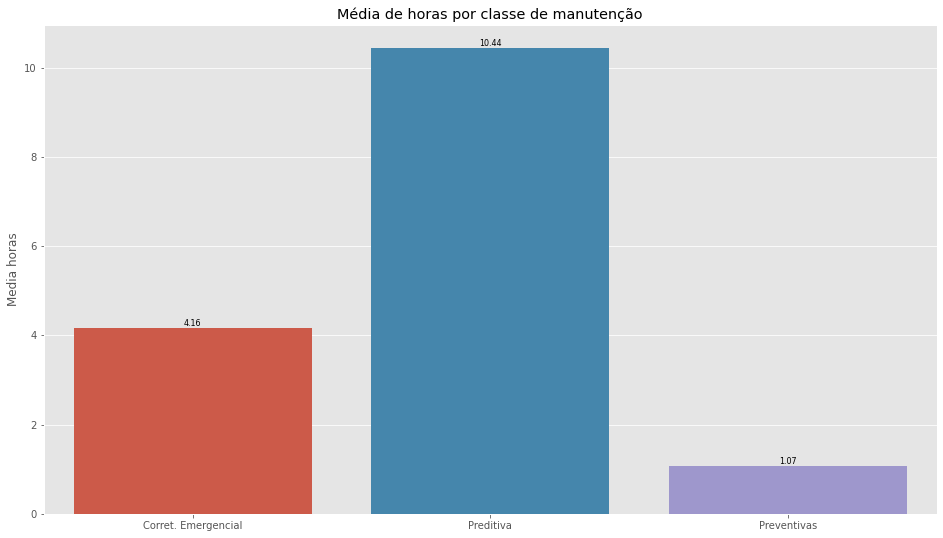

In [18]:
# grafico media classe manutencao geral
data_gmcmg = df.groupby(['desc_classe_manutencao'])['horas'].mean().reset_index()  # dados

fig, ax = plt.subplots(figsize=(16, 9))
gmcm = sns.barplot(ax=ax, data=data_gmcmg, y='horas', x='desc_classe_manutencao', ci=False)

for p in ax.patches:  # coloca o valor da coluna em cima dela
    if p.get_height() > 0:
        ax.text(p.get_x() + p.get_width()/2., p.get_height(), f'{round(p.get_height(), 2)}',
                fontsize=8, color='black', ha='center', va='bottom')
    else:
        continue

ax.set_title('Média de horas por classe de manutenção')
ax.set_ylabel('Media horas')
ax.set_xlabel('')

Manutenções preditivas demoram em media mais tempo.

#### Mes a mes

In [19]:
df_data = df.copy()

In [20]:
df_data.groupby('mes')['horas'].count()

mes
1       45
3        6
4     5119
5     6346
6     6831
7     7535
8     5940
9     6183
10    6067
11    5324
12    1667
Name: horas, dtype: int64

Devido ao baixo número de registros dos meses 1 e 3, iremos desconsidera-los nas analises temporais.

In [21]:
df_data = df_data.query('mes not in (1, 3)')

##### Gráfico 7

Text(0.5, 0, 'Mês')

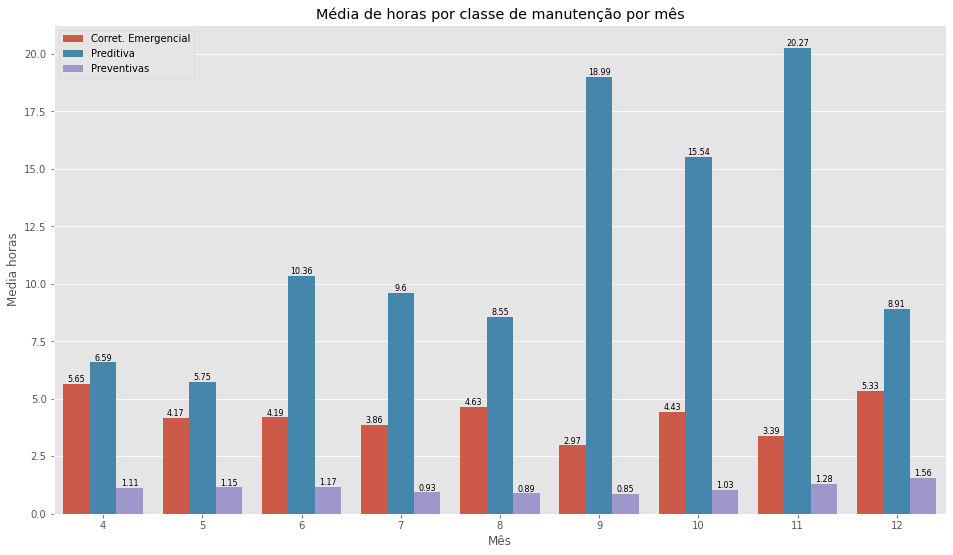

In [22]:
# grafico media classe manutencao mes
data_gmcmm = df_data.groupby(['desc_classe_manutencao', 'ano', 'mes'])['horas'].mean().reset_index()  # dados

fig, ax = plt.subplots(figsize=(16, 9))
gmcmm = sns.barplot(ax=ax, data=data_gmcmm, y='horas', x='mes', hue='desc_classe_manutencao', ci=False)

for p in ax.patches:  # coloca o valor da coluna em cima dela
    if p.get_height() > 0:
        ax.text(p.get_x() + p.get_width()/2., p.get_height(), f'{round(p.get_height(), 2)}',
                fontsize=8, color='black', ha='center', va='bottom')
    else:
        continue

ax.legend(title=False)
ax.set_title('Média de horas por classe de manutenção por mês')
ax.set_ylabel('Media horas')
ax.set_xlabel('Mês')

Há um aumento na media de horas de manutenções preditivas nos meses de setembro, outubro e novembro. Possiveis motivos incluem: funcionários que saem de férias neste periodo, maior demanda para outros tipos de manutenção. As manutenções corretivas emergenciais tem uma média mais constante, na casa das 4 horas. As preventivas seguem o mesmo padrão, mas com uma média menor, por volta de 1 hora por manutenção.

#### Distribuição por média de horas

In [23]:
horas_distribuicao = pd.cut(df_data['horas'], [0, 1, 2, 3, 4, 5, 10, inf],
                            labels=['<= 1', '1-2', '2-3', '3-4', '4-5', '5-10', '> 10'])
df_data['horas_range'] = horas_distribuicao

Cálculo das frequências

In [24]:
df_dist_agrupado = df_data.groupby(['horas_range', 'desc_classe_manutencao'])['horas'].agg(['count']).reset_index()

df_dist_agrupado['%freq'] = df_dist_agrupado['count'].div(sum(df_dist_agrupado['count']))*100
df_dist_agrupado['%freq_relativa'] = df_dist_agrupado.groupby(['horas_range',
                                                               'desc_classe_manutencao'])['count'].sum().div(df_dist_agrupado.groupby(['desc_classe_manutencao'])['count'].sum()).reset_index()['count']*100
print(df_dist_agrupado)

   horas_range desc_classe_manutencao  count      %freq  %freq_relativa
0         <= 1    Corret. Emergencial   7746  15.400521       28.050989
1         <= 1              Preditiva      7   0.013917        3.240741
2         <= 1            Preventivas  16819  33.439370       74.860907
3          1-2    Corret. Emergencial   6555  13.032586       23.737959
4          1-2              Preditiva     16   0.031811        7.407407
5          1-2            Preventivas   2287   4.546991       10.179374
6          2-3    Corret. Emergencial   3820   7.594886       13.833563
7          2-3              Preditiva     16   0.031811        7.407407
8          2-3            Preventivas   1096   2.179056        4.878266
9          3-4    Corret. Emergencial   2706   5.380043        9.799377
10         3-4              Preditiva     34   0.067598       15.740741
11         3-4            Preventivas    751   1.493131        3.342680
12         4-5    Corret. Emergencial   1947   3.871006        7

Base para os gráficos

Text(0.5, 0.98, 'Frequência de horas em cada classe de manutenção')

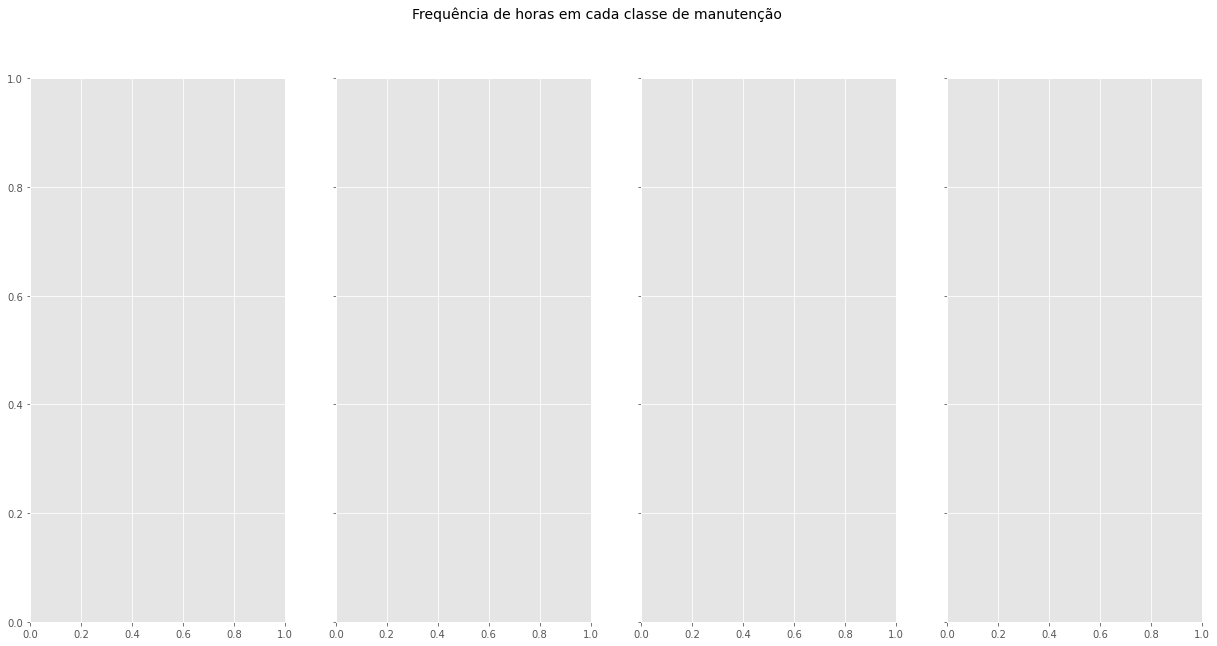

In [40]:
# grid  com 3 colunas de graficos
fig, axes = plt.subplots(ncols=4, figsize=(21, 10), sharey=True)
fig.suptitle('Frequência de horas em cada classe de manutenção', size=14)

Código do gráfico 1: Classes de manutenção agregadas

In [41]:
# grafico 1
data_g1 = df_dist_agrupado.groupby('horas_range').sum().reset_index()  # dados
g1 = sns.barplot(ax=axes[0], data=data_g1, x='horas_range', y='%freq')  # figura

for p in axes[0].patches:  # coloca o valor da coluna em cima dela
    axes[0].text(p.get_x() + p.get_width()/2., p.get_height(), f'{round(p.get_height(), 2)}',
            fontsize=12, color='black', ha='center', va='bottom')
# bot_ylim, top_ylim = plt.ylim()
# plt.ylim(bot_ylim, top_ylim*1.05)
axes[0].set_ylabel('Frequência (%)')
axes[0].set_xlabel('Horas de manutenção')
axes[0].set_title('Agregadas', fontdict={'fontsize': 12})

Text(0.5, 1.0, 'Agregadas')

Código do gráfico 2: Manutenções corretivas emergenciais

In [42]:
# grafico 2
data_g2 = df_dist_agrupado[df_dist_agrupado['desc_classe_manutencao'] == 'Corret. Emergencial'].groupby('horas_range').sum().reset_index()  # dados
g2 = sns.barplot(ax=axes[1], data=data_g2, x='horas_range', y='%freq_relativa')  # figura

for p in axes[1].patches:  # coloca o valor da coluna em cima dela
    axes[1].text(p.get_x() + p.get_width()/2., p.get_height(), f'{round(p.get_height(), 2)}',
            fontsize=12, color='black', ha='center', va='bottom')
# bot_ylim, top_ylim = plt.ylim()
# plt.ylim(bot_ylim, top_ylim*1.05)
axes[1].set_ylabel('Frequência (%)')
axes[1].set_xlabel('Horas de manutenção')
axes[1].set_title('Corretiva Emergencial', fontdict={'fontsize': 12})

Text(0.5, 1.0, 'Corretiva Emergencial')

Código do gráfico 3: Manutenções de apoio, preventivas por condição e por tempo

In [43]:
# grafico 3
data_g3 = df_dist_agrupado[df_dist_agrupado['desc_classe_manutencao'] == 'Preventivas'].groupby('horas_range').sum().reset_index()  # dados
g3 = sns.barplot(ax=axes[2], data=data_g3, x='horas_range', y='%freq_relativa')  # figura

for p in axes[2].patches:  # coloca o valor da coluna em cima dela
    axes[2].text(p.get_x() + p.get_width()/2., p.get_height(), f'{round(p.get_height(), 2)}',
            fontsize=12, color='black', ha='center', va='bottom')
# bot_ylim, top_ylim = plt.ylim()
# plt.ylim(bot_ylim, top_ylim*1.05)
axes[2].set_ylabel('Frequência (%)')
axes[2].set_xlabel('Horas de manutenção')
axes[2].set_title('Apoio, Preventiva Condição e\nPreventiva por Tempo', fontdict={'fontsize': 12})

Text(0.5, 1.0, 'Apoio, Preventiva Condição e\nPreventiva por Tempo')

Código do gráfico 4: Manutenções de apoio, preventivas por condição e por tempo

In [44]:
# grafico 4
data_g4 = df_dist_agrupado[df_dist_agrupado['desc_classe_manutencao'] == 'Preditiva'].groupby('horas_range').sum().reset_index()  # dados
g3 = sns.barplot(ax=axes[3], data=data_g4, x='horas_range', y='%freq_relativa')  # figura

for p in axes[3].patches:  # coloca o valor da coluna em cima dela
    axes[3].text(p.get_x() + p.get_width()/2., p.get_height(), f'{round(p.get_height(), 2)}',
            fontsize=12, color='black', ha='center', va='bottom')
# bot_ylim, top_ylim = plt.ylim()
# plt.ylim(bot_ylim, top_ylim*1.05)
axes[3].set_ylabel('Frequência (%)')
axes[3].set_xlabel('Horas de manutenção')
axes[3].set_title('Preditivas', fontdict={'fontsize': 12})

Text(0.5, 1.0, 'Preditivas')

##### Gráfico 8

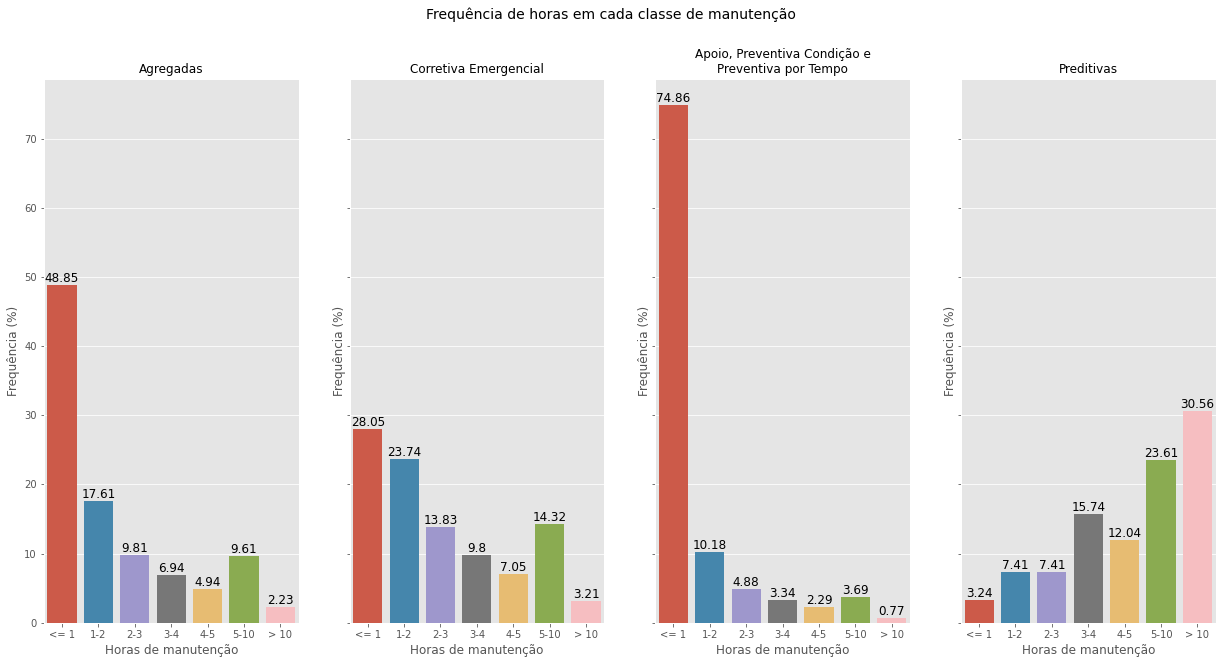

In [45]:
fig

#### Por sistema

In [91]:
df_classe_sistema = pd.DataFrame(df.groupby(['desc_sistema',
                                             'desc_classe_manutencao'])['horas'].sum().groupby(level=0).apply(percentage_per_class)).reset_index()

# ..
categories = list(df_classe_sistema.reset_index()['desc_classe_manutencao'].unique())

mux = pd.MultiIndex.from_product([df_classe_sistema['desc_sistema'].unique(), categories], names=('desc_sistema','desc_classe_manutencao'))
df_classe_sistema = df_classe_sistema.set_index(['desc_sistema','desc_classe_manutencao']).reindex(mux, fill_value=0).swaplevel(0,1).reset_index()


##### Gráfico 9

In [130]:
data_g9 = df_classe_sistema.reset_index()#.sort_values(['desc_classe_manutencao', 'horas'], ascending=False).reset_index(drop=True)

g9_total = data_g9.groupby('desc_sistema')['horas'].sum().reset_index()
g9_corret = data_g9.query('desc_classe_manutencao == "Corret. Emergencial"')
g9_prev = data_g9.query('desc_classe_manutencao == "Preventivas"')
g9_predi = data_g9.query('desc_classe_manutencao == "Preditiva"')

In [131]:
data_g9

,index,desc_classe_manutencao,desc_sistema,horas
0,0,Corret. Emergencial,Agregado câmbio,100.000000
1,1,Preventivas,Agregado câmbio,0.000000
2,2,Preditiva,Agregado câmbio,0.000000
3,3,Corret. Emergencial,Ar condicionado,77.783304
4,4,Preventivas,Ar condicionado,22.216696
...,...,...,...,...
70,70,Preventivas,Sistema hidráulico,15.159546
71,71,Preditiva,Sistema hidráulico,1.706115
72,72,Corret. Emergencial,Sistema industrial colhedora,86.370247
73,73,Preventivas,Sistema industrial colhedora,13.580089


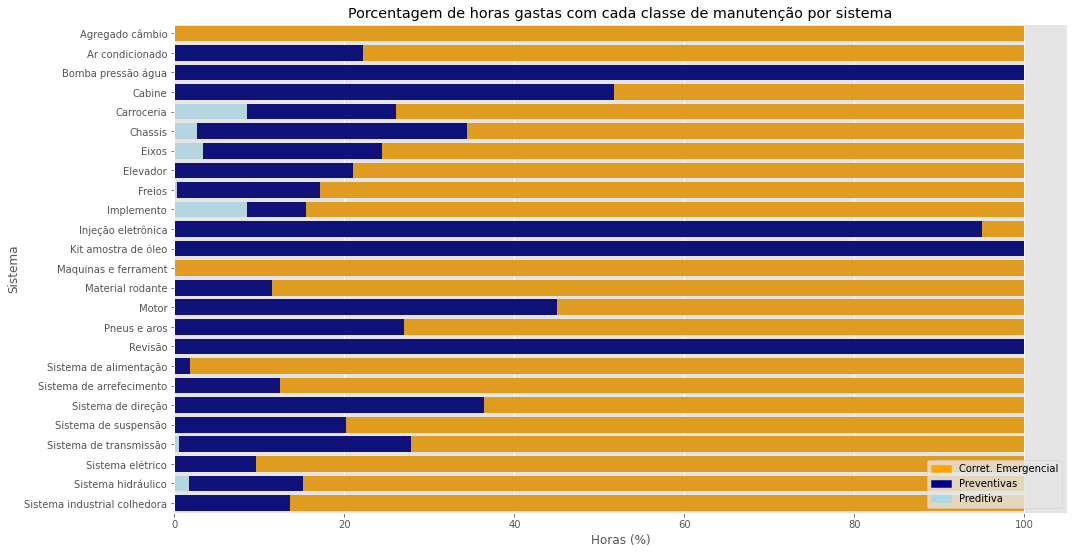

In [132]:
fig, ax = plt.subplots(figsize=(16, 9))

g9_bar1 = sns.barplot(ax=ax, data=g9_total, x='horas', y='desc_sistema', color='orange')
g9_bar2 = sns.barplot(ax=ax, data=g9_prev, x='horas', y='desc_sistema', color='darkblue')
g9_bar3 = sns.barplot(ax=ax, data=g9_predi, x='horas', y='desc_sistema', color='lightblue')

ax.set_title('Porcentagem de horas gastas com cada classe de manutenção por sistema')
ax.set_ylabel('Sistema')
ax.set_xlabel('Horas (%)')

 
g9_lg_bar1 = mpatches.Patch(color='orange', label='Corret. Emergencial')
g9_lg_bar2 = mpatches.Patch(color='darkblue', label='Preventivas')
g9_lg_bar3 = mpatches.Patch(color='lightblue', label='Preditiva')
plt.legend(handles=[g9_lg_bar1, g9_lg_bar2, g9_lg_bar3])
# o trampo que deu isso aqui nao ta escrito

Podemos visualizar que alguns sistemas sofrem mais com manutenções emergenciais, como 'Sistema de alimentação' e 'Agregado cambio', enquanto outros possuem uma predominancia de manutenções preventivas, como 'Bomba pressão água' e 'Injeção eletrônica'

In [126]:
data_g9.query('desc_sistema == "Revisão"')

,index,desc_classe_manutencao,desc_sistema,horas
48,48,Corret. Emergencial,Revisão,0.0
49,49,Preventivas,Revisão,100.0
50,50,Preditiva,Revisão,0.0


---

### Mês a mês

In [35]:
df_data.groupby('mes')['horas'].describe()

,count,mean,std,min,25%,50%,75%,max
mes,,,,,,,,
4,5119.0,3.584509,15.040369,0.0,0.33,1.30,3.520,219.98
5,6346.0,2.747890,13.388309,0.0,0.33,1.01,2.620,219.99
6,6831.0,2.730881,12.747726,0.0,0.30,1.00,2.665,219.97
7,7535.0,2.539283,12.196673,0.0,0.25,0.94,2.450,219.99
8,5940.0,2.961791,13.911942,0.0,0.28,0.97,2.950,219.99
9,6183.0,2.167912,5.531755,0.0,0.33,1.00,2.690,219.98
10,6067.0,3.007936,14.607350,0.0,0.33,1.00,2.630,219.99
11,5324.0,2.459955,6.979390,0.0,0.36,1.12,3.100,219.98
12,1667.0,3.612406,14.649646,0.0,0.48,1.45,3.600,219.98


##### Quantidade de manutenções

##### Gráfico 10

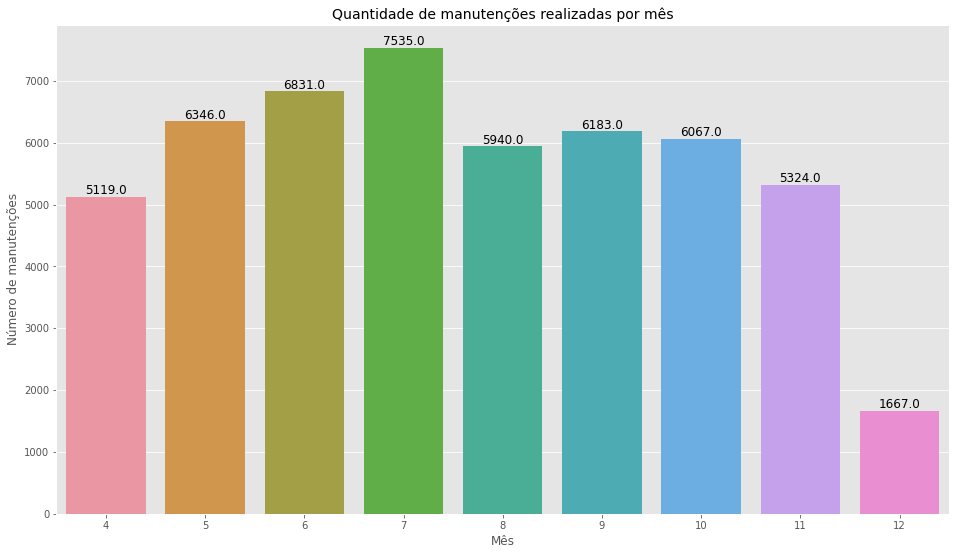

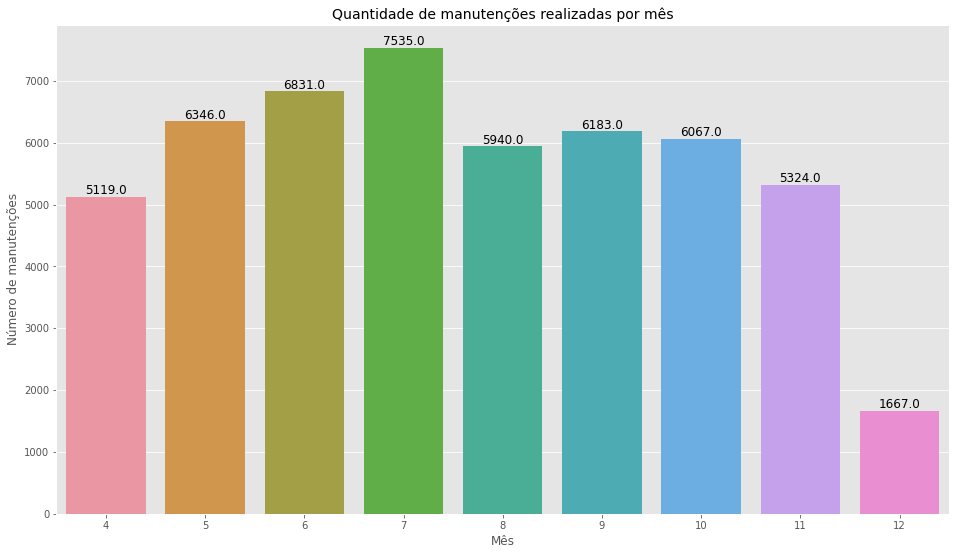

In [38]:
fig2, ax2 = plt.subplots(figsize=(16, 9))
data_gc1 = df_data.groupby('mes')['horas'].count().reset_index()  # dados
gc1 = sns.barplot(ax=ax2, data=data_gc1, x='mes', y='horas')  # figura

for p in ax2.patches:  # coloca o valor da coluna em cima dela
    ax2.text(p.get_x() + p.get_width()/2., p.get_height(), f'{round(p.get_height(), 2)}',
             fontsize=12, color='black', ha='center', va='bottom')

ax2.set_title('Quantidade de manutenções realizadas por mês', size=14)
ax2.set_ylabel('Número de manutenções')
ax2.set_xlabel('Mês')
# fig2